In [33]:
##결정 트리 분석, 시각화 산점도, 선형 회귀 그래프 이용할 예정
### 샘플 데이터, 센서 데이터의 움직임 수집한 데이터
### UCI 대학의 연구원들이 몸에 센서달고 몇일간 생활해서 움직임을 판단


In [34]:
##용어 정리
###결정 트리 : 머신러닝 알고리즘 중에 하나이고, 다중 분류를 하는데 사용 많이 함
###스스로 데이터 안에 특정 규칙을 찾아서 학습하고, 트리 구조 분류 규칙을 만든다.
###규칙노드, 리프노드(결정노드)
### EX) 날개가 있나요? : 규칙 노드
###       /          \
### 날수있니? 털이 있니? : 규칙노드
### /     \     /       \
###참새   펭귄  다람쥐  개구리

## 정보이득지수 : 엔트로피(entropy) 개념을 기반으로함
## 엔트로피 : 데이터 집합의 혼잡도를 의미
## ex) 데이터에 다른 데이터가 섞여서 균일도가 떨어지면 -> 혼잡도가 높다 -> 엔트로피가 높다
## 정보이득지수 = 1 - 엔트로피
## 엔트로피 높다 -> 정보이득지수 낮다. ->데이터가 순수하지않다(다른 데이터들이 섞여있다.)
## 엔트로피 낮다 -> 정보이득지수 높다. -> 데이터 균일도가 높다(다른 데이터들이 섞여있지 않다.)


## 지니계수 : 경제학 용어이고, 소득의 불균형의 정도를 나타낼 때 사용했고 우리는 데이터의 순도
## 지니계수가 높다 -> 순도가 낮은 데이터 집합(균일도 낮음 -> 엔트로피 높다 -> 다른데이터 많이 섞임)


##사이킷런에서 제공하는 결정 트리 분류 모델의 매개변수
## min_samples_split : 노드를 분할하기 위한 최소 샘플 데이터 갯수(기본값:2)
## min_samples_leaf : 리프 노드가 되기 위한 최소 샘플 데이터 갯수
## max_features : 최적의 분할을 하기 위한 고려해야할 최대 피처 갯수(ex. 독립변수)
## None : 모든 피처 사용, int : 사용할 피처의 갯수, float : 사용할 피처 개수를 퍼센트
## sqrt : 루트 계산

## max_depth : 트리의 최대 깊이
## max_leaf_node : 리프노드(결정노드)에 들어가는 샘플의 최대 데이터 갯수

##Gra


In [35]:
#샘플 데이터 소개 : README.txt 상세히 설명이 나옴
#요약 : 30명의 연구원이 데이터 수집에 참여했고, 삼성 갤럭시 s2를 착용하고, 6가지 움직임을 실험
#워킹, 계단 오르기, 계단 내리기, 눕기, 서있기, 앉기 등
#움직임은 가속계, 자이로스코프를 이용해서, XYZ 3축에 대한 데이터를 수집.

In [36]:
import pandas as pd
pd.__version__

'2.1.4'

In [37]:
#피처 이름 읽기
#header=None ->처음부터 실제값을 사용하겠다라는 의미
feature_name_df = pd.read_csv("./UCI HAR Dataset/features.txt",sep="\s+",header=None,names=["index","feature_name"],engine="python")
feature_name_df.head()

,index,feature_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [38]:
#데이터 갯수 조회
feature_name_df.shape

(561, 2)

In [39]:
#해당 피쳐 이름만 추출해보기
feature_name = feature_name_df.iloc[:,1].values.tolist()
#head() 함수와 동일한 기능
feature_name[:5]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y']

In [40]:
#샘플 데이터의 학습용 데이터, 평가용 데이터를 로드해서 메모리상에 불러오기
X_train = pd.read_csv("./UCI HAR Dataset/train/X_train.txt",sep="\s+",header=None,engine="python")
X_train.shape


(7352, 561)

In [41]:
#샘플 데이터의 학습용 데이터, 평가용 데이터를 로드해서 메모리상에 불러오기
Y_train = pd.read_csv("./UCI HAR Dataset/train/y_train.txt",sep="\s+",header=None,engine="python",names=["action"])
Y_train.shape

(7352, 1)

In [42]:
#샘플 데이터의 학습용 데이터, 평가용 데이터를 로드해서 메모리상에 불러오기
X_test = pd.read_csv("./UCI HAR Dataset/test/X_test.txt",sep="\s+",header=None,engine="python")
X_test.shape


(2947, 561)

In [43]:
#샘플 데이터의 학습용 데이터, 평가용 데이터를 로드해서 메모리상에 불러오기
Y_test = pd.read_csv("./UCI HAR Dataset/test/y_test.txt",sep="\s+",header=None,engine="python",names=["action"])
Y_test.shape

(2947, 1)

In [44]:
#train,test의 컬럼 달기
X_train.columns = feature_name
X_test.columns = feature_name

In [45]:
#X_train, 상위 5개 조회
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [46]:
#Y_train값 조회
print(f"Y_train['action'].value_counts() : {Y_train['action'].value_counts()}")

Y_train['action'].value_counts() : action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [47]:
#움직임의 6가지 라벨링 불러오기
label_name_df = pd.read_csv("./UCI HAR Dataset/activity_labels.txt",sep="\s",header=None,engine="python",names=["index","label"])


In [48]:
#인덱스 제거
label_name = label_name_df.iloc[:,1].values.tolist()
label_name

['WALKING',
 'WALKING_UPSTAIRS',
 'WALKING_DOWNSTAIRS',
 'SITTING',
 'STANDING',
 'LAYING']

In [49]:
#분석 모델 구축
from sklearn.tree import DecisionTreeClassifier


In [50]:
#모델 불러오기
dt_HAR = DecisionTreeClassifier()

In [51]:
#모델 훈련(학습시키기)
dt_HAR.fit(X_train,Y_train)

DecisionTreeClassifier()

In [52]:
#학습된 모델로 평가하기(예측값 구하기)
y_predict = dt_HAR.predict(X_test)

In [53]:
#정확도 측정해보기
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test,y_predict)
print(f"accuracy 정확도 : {accuracy}")
print("accuracy 정확도 : {0:.4f}".format(accuracy))

accuracy 정확도 : 0.8605361384458772
accuracy 정확도 : 0.8605


In [54]:
#결정 트리의 하이퍼 매개변수의 기본정보 -> gini 정보지수 확인용
#'criterion' : 'gini', 분할 기준이 지니 계수를 이용한다.
print("결정 트리의 하이퍼 매개변수의 기본 정보 : ", dt_HAR.get_params())

결정 트리의 하이퍼 매개변수의 기본 정보 :  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [55]:
#해당 정보를 이용해서, 기본 그래프 확인
#결정트리 시각화 툴 설치해서, 확인해보기
from sklearn.model_selection import GridSearchCV

#규칙노드와 결정노드 사이의 깊이 임의 설정-> 모델에 넘김
#모델은 전달받은 depth 스스로 학습 -> 최적깊이 찾음
params = {
  "max_depth" : [6,8,10,12,16,20,24]
}

#scoring="accuracy" -> 평가 지표:정확도 기준
#cv=5 -> 교차 검증 5번 (4개의 훈련셋,1개의 검증, 5번반복)
#return_train_score=True -> 훈련 데이터에 대한 성능 점수를 반환 받겠다.
gride_cv = GridSearchCV(dt_HAR,param_grid=params, scoring="accuracy", cv=5, return_train_score=True)

#교차 검증 이용해서 모델에 학습시키기(학습용 문제, 학습용 답지)
gride_cv.fit(X_train, Y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [56]:
cv_results_df = pd.DataFrame(gride_cv.cv_results_)

cv_results_df[["param_max_depth","mean_test_score","mean_train_score"]]

,param_max_depth,mean_test_score,mean_train_score
0,6,0.850247,0.944879
1,8,0.852836,0.982692
2,10,0.847400,0.993403
3,12,0.844815,0.997212
4,16,0.843046,0.999660
5,20,0.842502,0.999966
6,24,0.846039,1.000000


In [57]:
print("최고의 평균 정확도 : {0:.4f}".format(gride_cv.best_score_))
print("최적의 하이퍼 매개변수 : {0}".format(gride_cv.best_params_))

최고의 평균 정확도 : 0.8528
최적의 하이퍼 매개변수 : {'max_depth': 8}


In [58]:
#2번째 교차검증을 해서, 조금 더 정확한 결과 확인해보기
params = {
  "max_depth" : [8,16,20],
  "min_samples_split":[8,16,24]
}

#모델 학습시키기, 옵션 코드 동일해서 위의 코드 재사용

#scoring="accuracy" -> 평가 지표:정확도 기준
#cv=5 -> 교차 검증 5번 (4개의 훈련셋,1개의 검증, 5번반복)
#return_train_score=True -> 훈련 데이터에 대한 성능 점수를 반환 받겠다.
gride_cv = GridSearchCV(dt_HAR,param_grid=params, scoring="accuracy", cv=5, return_train_score=True)

#교차 검증 이용해서 모델에 학습시키기(학습용 문제, 학습용 답지)
gride_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [8, 16, 20],
                         'min_samples_split': [8, 16, 24]},
             return_train_score=True, scoring='accuracy')

In [60]:
cv_results_df = pd.DataFrame(gride_cv.cv_results_)
# cv_results_df
cv_results_df[["param_max_depth","param_min_samples_split","mean_test_score","mean_train_score"]]

,param_max_depth,param_min_samples_split,mean_test_score,mean_train_score
0,8,8,0.846988,0.981468
1,8,16,0.851205,0.979836
2,8,24,0.855966,0.978237
3,16,8,0.846312,0.994525
4,16,16,0.840736,0.990445
5,16,24,0.842774,0.986806
6,20,8,0.844951,0.994559
7,20,16,0.843589,0.990581
8,20,24,0.846038,0.986840


In [62]:
print("최고의 평균 정확도 : {0:.4f}, 최적의 하이퍼 매개변수 : {1}".format(gride_cv.best_score_,gride_cv.best_params_))

최고의 평균 정확도 : 0.8560, 최적의 하이퍼 매개변수 : {'max_depth': 8, 'min_samples_split': 24}


In [63]:
#최적의 파라미터를 찾았고, 이 파라미터 이용해서
#최적의 모델 구현해서, 다시 학습 후, 예측값을 구해서, 다시 평가 지표 점수를 확인.
#최적의 모델이라고 보면 됨.
best_dt_HAR = gride_cv.best_estimator_

#최적의 모델을 이용해서 학습시키기
best_Y_predict = best_dt_HAR.predict(X_test)

#채점(정확도 확인하기)
best_accuracy = accuracy_score(Y_test,best_Y_predict)

print("베스트 결정 트리 예측 정확도 : {0:.4f}".format(best_accuracy))

베스트 결정 트리 예측 정확도 : 0.8690


In [64]:
#간단한 막대 그래프로 시각화
#독립변수가 : 561개 있음. 그중에서 중요도가 높은 피처(독립변수) 10개를 찾아서 그래프 그리기

import seaborn as sns
import matplotlib.pyplot as plt



In [66]:
#561개의 피쳐 중에서 중오도로 10개 뽑기
feature_importances_values = best_dt_HAR.feature_importances_

#데이터 타입을 시리즈로 변환해서 출력(행,열이 한개씩 표현되는 데이터 구조)
feature_importances_values_series = pd.Series(feature_importances_values,index=X_train.columns)

#내림차순 정렬해서, 상위 10개만 슬라이싱으로 추출
feature_top10 = feature_importances_values_series.sort_values(ascending=False)[:10]

feature_top10


tGravityAcc-min()-X                0.254008
fBodyAccJerk-bandsEnergy()-1,24    0.214590
angle(Y,gravityMean)               0.143406
fBodyAccMag-energy()               0.115776
tGravityAcc-arCoeff()-Z,2          0.101810
fBodyGyro-maxInds-X                0.024033
tBodyGyro-correlation()-Y,Z        0.016556
tGravityAcc-energy()-Y             0.016476
tBodyAccMag-arCoeff()1             0.012645
fBodyAcc-max()-Y                   0.008847
dtype: float64

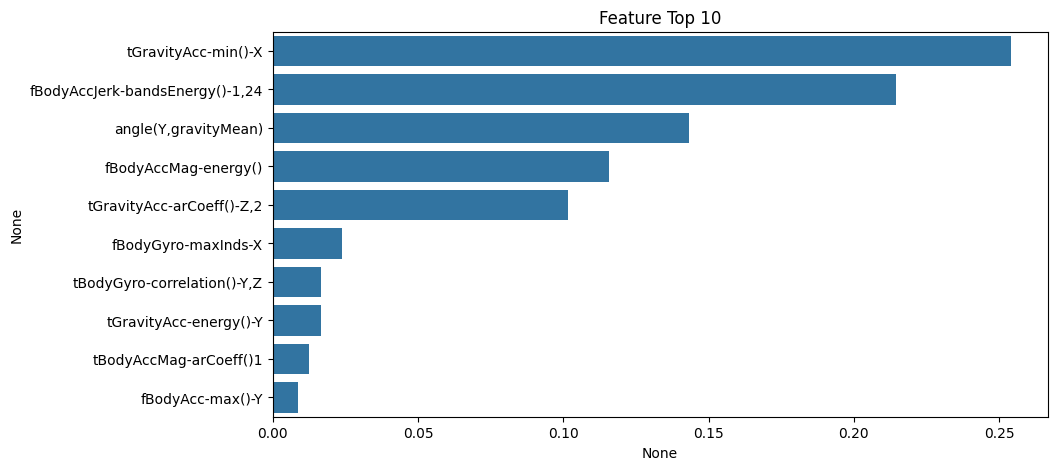

In [67]:
#그림그리기
plt.figure(figsize=(10,5))
plt.title("Feature Top 10")
sns.barplot(x=feature_top10,y=feature_top10.index)
plt.show()

In [ ]:
## 시각화 도구 설치 순서
### Graphviz를 사용한 결정트리 시각화
### 이슈 
### https://graphviz.gitlab.io/download/
### 다운로드 

### 설치 , 기본 설정 -> C:\Program Files\Graphviz 이 경로의 폴더를 복사.
### C:\Python\Python310 하위에 폴더 붙여넣기.

### 이동후 , 경로 -> C:\Python\Python310\Graphviz\bin
### 시스템 환경 설정 패스에도 
### 	- -bin
### 	- -bin/dot.exe 
	


### 마지막 코드에 직접 추가
### import os
### os.environ["PATH"]+=os.pathsep+'C:/Python/Python310/Graphviz/bin/'


In [75]:
from sklearn.tree import export_graphviz
export_graphviz(best_dt_HAR, out_file="tree.dot", class_names=label_name, feature_names= feature_name, impurity=True, filled=True)

In [ ]:
!pip install graphviz

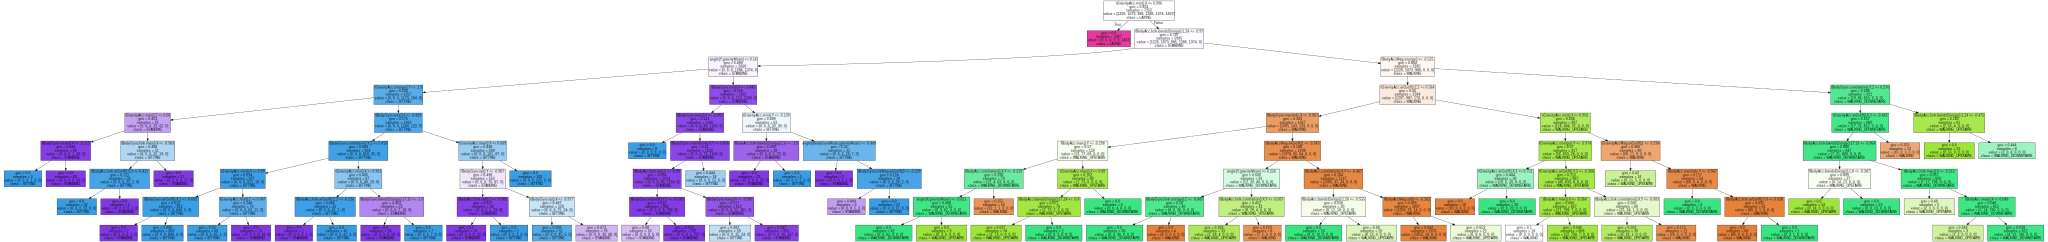

In [81]:
import graphviz
import os
os.environ["PATH"]+=os.pathsep+'C:/Python/Python310/Graphviz/bin/'

with open("tree.dot") as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)